In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter, CoxPHFitter

Read the data

In [2]:
DatOriginal = pd.read_csv("DatasetsMedicalResearch/Comparison of two treatments for prostatic cancer.dat", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7592/1212411937.py:1: SyntaxWarning: invalid escape sequence '\s'
  DatOriginal = pd.read_csv("DatasetsMedicalResearch/Comparison of two treatments for prostatic cancer.dat", sep="\s+")


In [3]:
DatOriginal.head()

,patient,treatment,time,status,age,shb,size,index
0,1,1,65,0,67,13.4,34,8
1,2,2,61,0,60,14.6,4,10
2,3,2,60,0,77,15.6,3,8
3,4,1,58,0,64,16.2,6,9
4,5,2,51,0,65,14.1,21,9


In [4]:
DatOriginalPlacebo = DatOriginal[DatOriginal['treatment']==1]
DatOriginalDes = DatOriginal[DatOriginal['treatment']==2]

In [5]:
cph = CoxPHFitter()
Model = cph.fit(DatOriginal, 'time', 'status', formula='size+index', strata='treatment')

In [6]:
Model.print_summary()

<lifelines.CoxPHFitter: fitted with 38 total observations, 32 right-censored observations>
             duration col = 'time'
                event col = 'status'
                   strata = treatment
      baseline estimation = breslow
   number of observations = 38
number of events observed = 6
   partial log-likelihood = -9.35
         time fit was run = 2024-09-08 13:37:19 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
size       0.07      1.07      0.05           -0.03            0.16                0.97                1.18
index      0.65      1.92      0.34           -0.02            1.33                0.98                3.77

           cmp to    z    p  -log2(p)
covariate                            
size         0.00 1.39 0.16      2.61
index        0.00 1.90 0.06      4.13
---
Concordance = 0.82
Partial AIC = 22.69
log-likelihood ratio test = 7.89 on 2 df
-log2(p) of ll-ratio test = 5.69

Text(0.5, 1.0, 'Risk-adjusted estimate')

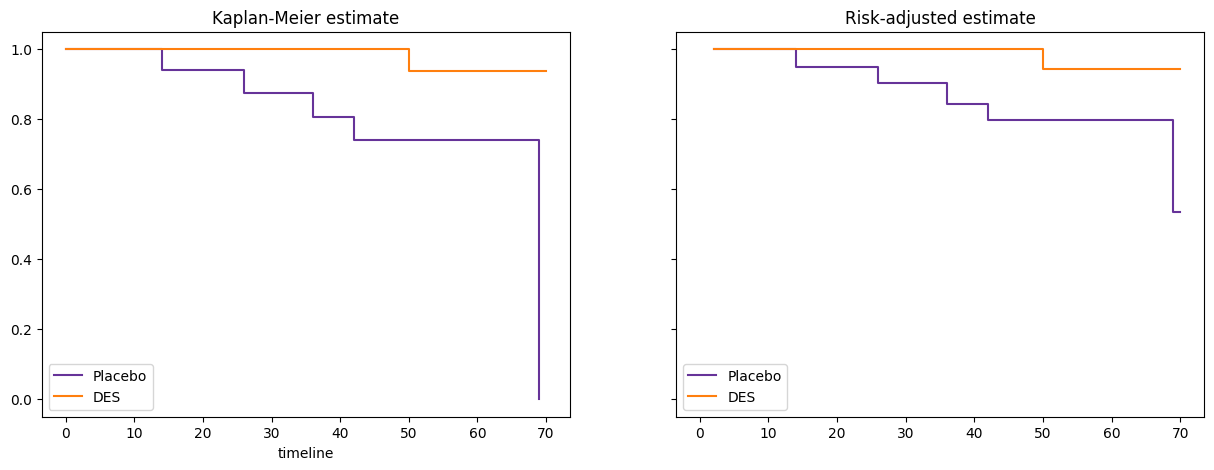

In [7]:
f, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True, sharey=True) # The subfigures share the same x axis

# Unadjusted
kmf = KaplanMeierFitter()
kmf.fit(DatOriginalPlacebo['time'], event_observed=DatOriginalPlacebo['status'], label="Placebo")
kmf.plot_survival_function(ax=ax[0], color='rebeccapurple', ci_show=False)

kmf.fit(DatOriginalDes['time'], event_observed=DatOriginalDes['status'], label="DES")
kmf.plot_survival_function(ax=ax[0], ci_show=False)

# Risk-adjusted
Model.predict_survival_function(DatOriginalPlacebo).mean(axis=1).plot(ax=ax[1], drawstyle="steps-post", color='rebeccapurple', label='Placebo')
Model.predict_survival_function(DatOriginalDes).mean(axis=1).plot(ax=ax[1], drawstyle="steps-post", color=plt.cm.tab10.colors[1], label='DES')

ax[1].legend(loc='lower left')

ax[0].set_title("Kaplan-Meier estimate")
ax[1].set_title("Risk-adjusted estimate")